In [7]:
#Gestion des imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm
#from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectFromModel

## Import du fichier propre

In [2]:
df=pd.read_csv('cleansed_data.csv', sep=',')
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


# Premiers tests basiques

In [256]:
#Test avec l'âge

X = pd.DataFrame(df['age'])
Y=df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [257]:
#Mise à l'échelle des données d'entrainement
scaler = StandardScaler()
scaler.fit(X_train)
#Mise à l'échele des features de nos 2 ensembles de données : Entrainement et Test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Régression linéaire

In [258]:
linear_model=LinearRegression()

In [259]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [260]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = linear_model.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 11199.316608684396
le score R2 est 0.08392071944001755


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 12894.779883028823
le score R2 score est 0.09513000782072023


In [261]:
#Test avec le bmi

X = pd.DataFrame(df['bmi'])
Y=df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [262]:
#Mise à l'échelle des données d'entrainement
scaler = StandardScaler()
scaler.fit(X_train)
#Mise à l'échele des features de nos 2 ensembles de données : Entrainement et Test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [264]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = linear_model.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 11513.261713446038
le score R2 est 0.031840816135986105


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 13200.443951702524
le score R2 score est 0.051722611542952324


On est bon dans 5% des cas HAAHAHAHA!

In [265]:
# Test avec Bmi et âge

X = pd.DataFrame(df['bmi'], df['age'])
Y=df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [266]:
#Mise à l'échelle des données d'entrainement
scaler = StandardScaler()
scaler.fit(X_train)
#Mise à l'échele des features de nos 2 ensembles de données : Entrainement et Test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [267]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [268]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = linear_model.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 11687.139771918895
le score R2 est 0.0023769116286529446


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 13562.448690308474
le score R2 score est -0.001001057772490821


De pire en pire : le site : https://moncoachdata.com/blog/regression-lineaire-sur-un-cas-reel/ ne semble pas être de bons conseils pour notre modélisation

In [269]:
# Test avec avec toutes les variables continues

X = pd.DataFrame(df['bmi'], df['age'], df['children'])
Y=df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [270]:
#Mise à l'échelle des données d'entrainement
scaler = StandardScaler()
scaler.fit(X_train)
#Mise à l'échele des features de nos 2 ensembles de données : Entrainement et Test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## PreProcessing Datas

In [377]:
# Test doc de sklearn

X, y = make_classification(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])
# pipe.score(X_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

La fonction makepipeline nous permettra par la suite de faire passe nos données par toute un process afin de prédire au mieux les charges pour chaque sujet. La représentation visuelle est plutôt cool

In [378]:
X = pd.DataFrame(df['bmi'], df['age'])
Y=df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, Y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [379]:
pipe.score(X_test, Y_test)

-0.001001057772490821

In [380]:
#Encodage des datas : 
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['sex','smoker','region']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['sex','smoker','region']))

#df_encoded = pd.concat([df.drop(columns=['sex','smoker','region']), encoded_df])
df_encoded = pd.concat([df.drop(columns=['sex','smoker','region']), encoded_df], axis=1)

df_encoded = df_encoded.reset_index(drop=True)
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [275]:
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [381]:
#Test avec l'âge

X = df_encoded[['age', 'bmi', 'sex_female', 'sex_male',
                'smoker_no', 'smoker_yes', 'region_northeast',
                  'region_northwest', 'region_southeast', 'region_southwest']]
Y=df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [383]:
#Mise à l'échelle des données d'entrainement
scaler = StandardScaler()
scaler.fit(X_train)
#Mise à l'échele des features de nos 2 ensembles de données : Entrainement et Test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

linear_model.fit(X_train, Y_train)
linear_model.score(X_train, Y_train)

0.726961300625627

In [278]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = linear_model.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 6114.164166491725
le score R2 est 0.726961300625627


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 5952.1474947087245
le score R2 score est 0.8072005950734589


Hourra, on comment à obtenir un vrai modèle par ici avec un R2 correct ! 
Let's try to improve that !

## Premières tentatives d'amélioration

In [279]:
reg_multi = smf.ols('charges~age+bmi+sex_female+sex_male+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest', data=df_encoded).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     565.1
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:00:12   Log-Likelihood:                -13544.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1329   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -107.8013    429.018  

In [280]:
#Tentative sans les variables qui semblent inutiles

reg_multi = smf.ols('charges~age+bmi+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest', data=df_encoded).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     659.7
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:00:12   Log-Likelihood:                -13544.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1330   BIC:                         2.714e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -134.9743    551.296  

In [281]:
reg_multi = smf.ols('charges~age+bmi+smoker_no+smoker_yes', data=df_encoded).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1314.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:00:12   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1333   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.5984    627.170      0.254      0.7

La suppression des variables qui semblent moins significatives ne font pas apparaitre d'énormes changements dans notre modèle

In [282]:
#Formule de prédiction charges~+bmi+smoker_no+smoker_yes
a_prevoir = pd.DataFrame({'age': 35, 'bmi': 28, 'smoker_no': 1, 'smoker_yes': 0}, index=[0])
charge_prev = reg_multi.predict(a_prevoir)
print(round(charge_prev[0], 2))

6442.39


<Axes: >

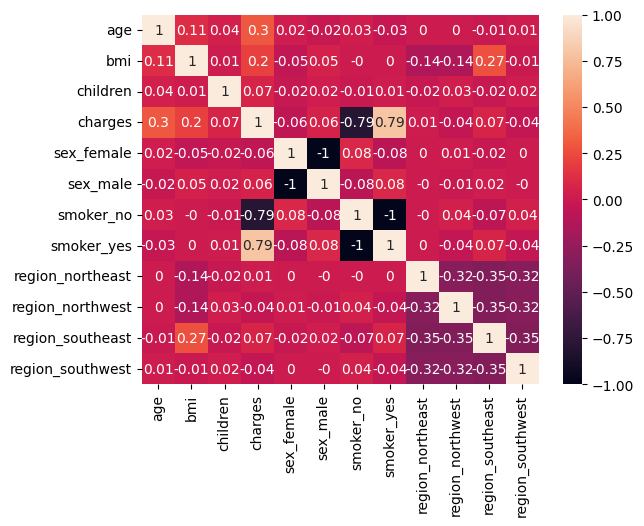

In [283]:
correlation_matrix = df_encoded.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/r%C3%A9gressions-lin%C3%A9aires-en-python pour mieux comprendre l'intérêt de regarder les résidus
https://larevueia.fr/regression-lineaire-fonctionnement-et-exemple-avec-python/ pour trouver les coefficients et tracer la courbe

Suppression colonne smoker yes et smoker no pour en une seule colonne et test

In [284]:
#Encodage des datas : 
enc = OrdinalEncoder()
encods = enc.fit(df[["smoker"]])
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['sex','region']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['sex','region']))

#df_encoded = pd.concat([df.drop(columns=['sex','smoker','region']), encoded_df])
df_encoded = pd.concat([df.drop(columns=['sex','region']), encoded_df], axis=1)

df_encoded = df_encoded.reset_index(drop=True)
df_encoded

pipe = make_pipeline(enc, encoder, StandardScaler(), LinearRegression())
pipe.fit(X_train, Y_train) 

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('onehotencoder', OneHotEncoder(sparse_output=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [285]:

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)

pipe=make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('linearregression', LinearRegression())])

Modèle parait bon mais il faudrait voir pour vérifier ce qu'on a en sortiedes ordinale et  hot encoder pour vérifier qu'on a bien les bons trucs. 
Aussi, il faudrait savoir a peu pres ce que fait le StandardScaler, parce que pour le moment c'est un peu mystique.
Parce qu'en regardant pour scaler les autres colonnes j'ai pris une erreur, genre peut pas convertir "male" en float... chelou quand même si c'est mis en mode 

In [289]:
X_train_transformed = preprocessor.fit_transform(X_train)

# Pour obtenir les noms des colonnes après transformation
transformed_columns = (
    preprocessor.named_transformers_["onehot"].get_feature_names_out(["sex", "region"]).tolist()
    + ["smoker"]  # Pour la colonne transformée par OrdinalEncoder
    + ["age", "bmi", "children"]  # Colonnes standardisées
)

# Convertir en DataFrame pour inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)

X_train_transformed_df

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker,age,bmi,children
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.157680,-0.996928,-0.907908
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.300619,-0.792762,0.766904
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.914926,1.154664,0.766904
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.701087,1.806837,-0.907908
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.557580,-0.651417,0.766904
...,...,...,...,...,...,...,...,...,...,...
1064,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.843457,0.730628,0.766904
1065,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.871804,2.539188,0.766904
1066,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.372088,-1.411872,-0.070502
1067,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.085643,-0.419974,1.604310


In [287]:
#Cross-validation, here the 5-fold cv:
cv=5
#cross_val to obtain the evaluation scores
scores = cross_val_score(pipe, X, y,scoring='neg_mean_squared_error', cv =cv)
#convert the negative mean squared error scores to positives values
mse_scores=-scores
#Compute the mean and standard deviation of the cross_vali scores
mean_mse = np.mean(mse_scores)
std_mse=np.mean(mse_scores)

print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

Mean MSE: 36934765.35567569
Standard Deviation of MSE: 36934765.35567569


Cross-Validation Results: Review the mean squared error (MSE) obtained from cross-validation. A lower MSE indicates better predictive performance. Assess the consistency of the performance across the folds by considering the standard deviation of the MSE scores. A lower standard deviation suggests a more stable model.

Coefficient Analysis: If you are using a linear regression model, interpret the coefficients to identify the impact of each feature on the predicted housing prices. Positive coefficients indicate a positive relationship, while negative coefficients suggest a negative relationship. The magnitude of the coefficients represents the strength of the influence.

Residual Analysis: Examine the residuals (the differences between the predicted and actual sale prices) to identify any patterns or biases in the model’s predictions. Plot the residuals against the predicted values to check for heteroscedasticity (unequal variance) or any systematic errors in the predictions. Addressing these patterns may lead to improvements in the model.

Validation Set Metrics: Evaluate the model’s performance on the validation set. Compare the mean squared error (MSE) and R-squared values to assess how well the model generalizes to unseen data. A lower MSE and a higher R-squared indicate better performance.

By interpreting and analyzing the results, you can gain valuable insights into the model’s performance and the underlying patterns in the data. These insights can guide further improvements in the pipeline, feature selection, or model selection to enhance the predictive power of the regression model.

In [288]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = pipe.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = pipe.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 6081.106881541277
le score R2 est 0.7299057809339075


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 5956.342894363585
le score R2 score est 0.8069287081198013


## Polynomial features

In [291]:

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2)

pipe=make_pipeline(preprocessor, polynomial, LinearRegression())
pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [293]:
#Cross-validation, here the 5-fold cv:
cv=5
#cross_val to obtain the evaluation scores
scores = cross_val_score(pipe, X, y,scoring='neg_mean_squared_error', cv =cv)
#convert the negative mean squared error scores to positives values
mse_scores=-scores
#Compute the mean and standard deviation of the cross_vali scores
mean_mse = np.mean(mse_scores)
std_mse=np.mean(mse_scores)

print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

Mean MSE: 23962872.365143225
Standard Deviation of MSE: 23962872.365143225


In [292]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = pipe.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = pipe.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 4766.993577718228
le score R2 est 0.8340263483080009


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 4646.056793068933
le score R2 score est 0.882529897246852


Amélioration du modèle

## Utilisation du stratify

In [295]:

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2)

pipe=make_pipeline(preprocessor, polynomial, LinearRegression())
pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [296]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = pipe.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = pipe.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 4922.664029656003
le score R2 est 0.8352892310249822


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 3943.5076122963414
le score R2 score est 0.892121704685785


Amélioration légère du modèle

## Test Lasso

In [387]:
#Pour des distribution clairsemés, precompute = False
#Possibilité de mettre un nb max d'itérations


X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
#polynomial = PolynomialFeatures(degree=2)

pipe=make_pipeline(preprocessor, Lasso(alpha=0.5))
pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lasso', Lasso(alpha=0.5))])

In [388]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = pipe.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = pipe.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 6266.165779354963
le score R2 est 0.7331142639511522


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 5086.712174007829
le score R2 score est 0.8205088514228982


In [389]:
#Pour des distribution clairsemés, precompute = False
#Possibilité de mettre un nb max d'itérations


X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2)

pipe=make_pipeline(preprocessor, polynomial, Lasso())
pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso())])

In [390]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = pipe.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = pipe.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 4922.688452841569
le score R2 est 0.835287596636923


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 3940.5945812722657
le score R2 score est 0.8922810231323028


## Test Ridge

In [391]:
#Pour des distribution clairsemés, precompute = False
#Possibilité de mettre un nb max d'itérations


X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2)

pipe=make_pipeline(preprocessor, Ridge(alpha=1))
pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('ridge', Ridge(alpha=1))])

In [392]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = pipe.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = pipe.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))


La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 6266.4101196629435
le score R2 est 0.7330934498786739


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 5089.254000484249
le score R2 score est 0.8203294234040258


In [393]:
#Pour des distribution clairsemés, precompute = False
#Possibilité de mettre un nb max d'itérations


X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2)

pipe=make_pipeline(preprocessor, polynomial, Ridge(alpha=1))
pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])

In [394]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = pipe.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = pipe.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))


La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 4878.763520717394
le score R2 est 0.8378362511102053


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 3815.47365415944
le score R2 score est 0.8995427665885594


In [395]:
R2 = metrics.r2_score(y_train, y_train_predict)
R2
MSE = metrics.mean_squared_error(y_train, y_train_predict)
MSE
MAE = metrics.mean_absolute_error(y_train, y_train_predict)
MAE

2986.9579882365933

In [396]:
def get_scores(y_true, y_pred):
    R2 = metrics.r2_score(y_true, y_pred)
    MSE = metrics.mean_squared_error(y_true, y_pred)
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    return f'R2 : {R2}, MSE : {MSE}, MAE : {MAE}'


In [397]:
get_scores(y_train, y_train_predict)

'R2 : 0.8378362511102053, MSE : 23802333.491082784, MAE : 2986.9579882365933'

## ElasticNet

In [398]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2)

pipe=make_pipeline(preprocessor, polynomial, ElasticNet
                   (alpha=1))
pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('elasticnet', ElasticNet(alpha=1))])

In [399]:
y_pred=pipe.predict(X_train
                    )
get_scores(y_train, y_pred)

'R2 : 0.6051808012498103, MSE : 57951412.08606778, MAE : 5763.416138798369'

## Gridsearch


In [400]:
# Transformation des ensembles d'entraînement et de test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

ridge = Ridge()
parameters = {"alpha": [1, 10, 100, 290, 500],
              "fit_intercept": [True, False],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
             }
grid = GridSearchCV(estimator=ridge, param_grid = parameters,scoring='r2', cv =10, n_jobs=-1)
grid.fit(X_train_transformed, y_train)

# Meilleur modèle et évaluation sur l'ensemble de test
best_model = grid.best_estimator_
test_score = best_model.score(X_test_transformed, y_test)

print("Best parameters:", grid.best_params_)
print("R2:", test_score)

Best parameters: {'alpha': 1, 'fit_intercept': False, 'solver': 'lsqr'}
R2: 0.8265636936617666


In [401]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])


# Transformation des ensembles d'entraînement et de test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

lasso = Lasso()
parameters = {"alpha": [0.1, 0.5, 1, 10, 100],
              "fit_intercept": [True, False],
              "max_iter": [1000, 5000, 10000], 
             }
grid = GridSearchCV(estimator=lasso, param_grid = parameters,scoring='r2', cv =10, n_jobs=-1, verbose=1)
grid.fit(X_train_transformed, y_train)

# Meilleur modèle et évaluation sur l'ensemble de test
best_model = grid.best_estimator_
test_score = best_model.score(X_test_transformed, y_test)

print("Best parameters:", grid.best_params_)

print("R2:", test_score)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best parameters: {'alpha': 10, 'fit_intercept': False, 'max_iter': 1000}
R2: 0.8207381592498137


Courbe d'apprentissage

In [411]:
N, train_score, val_score = learning_curve(best_model, X_train_transformed, y_train ,cv=5)
N

array([ 85, 277, 470, 662, 855])

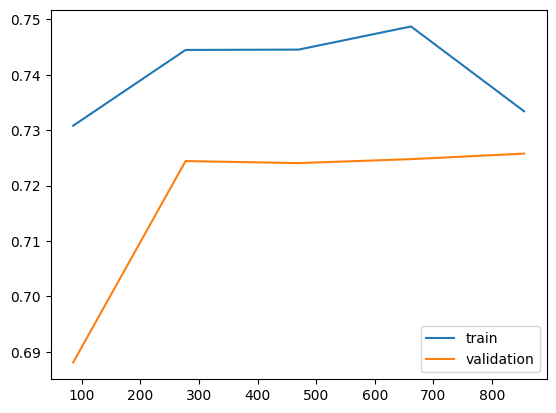

In [413]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()

In [427]:
#TEST avec polynomial et normalisattion et compagnie

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=7)
#normalizer = preprocessing.normalize(X_train, norm='max')

pipe=make_pipeline(preprocessor,polynomial, LinearRegression())
pipe.fit(X_train, y_train)  
pipe.score(X_train, y_train)

0.9647428546935195

Problème de surapprentissage avec un degré élevé de polynome ?

In [429]:
#Test du degré de polynome 

for degree in range(1, 8):  # Tester des degrés de 1 à 7
    pipe = make_pipeline(preprocessor, PolynomialFeatures(degree=degree), LinearRegression())
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2")
    print(f"Degré: {degree}, Score moyen (validation croisée): {scores.mean()}")


Degré: 1, Score moyen (validation croisée): 0.7257573536108108
Degré: 2, Score moyen (validation croisée): 0.8226240368091033
Degré: 3, Score moyen (validation croisée): 0.8099452146174191
Degré: 4, Score moyen (validation croisée): 0.6857643800856195
Degré: 5, Score moyen (validation croisée): -16.807299377245833
Degré: 6, Score moyen (validation croisée): -464.4931690746562
Degré: 7, Score moyen (validation croisée): -50665313.48067494


Le meilleur score reste le degré 2, on voit que ça se dégrade à partir du degré 3

In [430]:
#Test avec Ridge

pipe = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Ridge(alpha=1.0))
pipe.fit(X_train, y_train)
print("Score sur l'ensemble d'entraînement :", pipe.score(X_train, y_train))
print("Score sur l'ensemble de test :", pipe.score(X_test, y_test))

Score sur l'ensemble d'entraînement : 0.8340174039190829
Score sur l'ensemble de test : 0.8825306126451828


In [431]:
#Test avec Lasso

pipe = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Lasso(alpha=1.0))
pipe.fit(X_train, y_train)
print("Score sur l'ensemble d'entraînement :", pipe.score(X_train, y_train))
print("Score sur l'ensemble de test :", pipe.score(X_test, y_test))

Score sur l'ensemble d'entraînement : 0.8340245013087528
Score sur l'ensemble de test : 0.8826650073397004


In [432]:
#Test avec ElasticNet

pipe = make_pipeline(preprocessor, PolynomialFeatures(degree=2), ElasticNet(alpha=1.0, l1_ratio = 0.5, random_state=42))
pipe.fit(X_train, y_train)
print("Score sur l'ensemble d'entraînement :", pipe.score(X_train, y_train))
print("Score sur l'ensemble de test :", pipe.score(X_test, y_test))

Score sur l'ensemble d'entraînement : 0.5997267172211717
Score sur l'ensemble de test : 0.5966516529426122


In [433]:
# Liste des degrés à tester
degrees = range(1, 8)

# Paramètres d'ElasticNet
alpha = 1.0  # Coefficient de régularisation (L1 + L2)
l1_ratio = 0.5  # Ratio entre L1 et L2 (0 = pur Ridge, 1 = pur Lasso)

# Tester différents degrés de polynômes
for degree in degrees:
    pipe = make_pipeline(
        preprocessor,                         # Prétraitement des données
        PolynomialFeatures(degree=degree),    # Transformation polynomiale
        ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)  # Modèle ElasticNet
    )
    
    # Validation croisée
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2")
    print(f"Degré: {degree}, Score moyen (validation croisée): {scores.mean()}")

Degré: 1, Score moyen (validation croisée): 0.3611446483272152
Degré: 2, Score moyen (validation croisée): 0.5877055371933064
Degré: 3, Score moyen (validation croisée): 0.7233546921916831
Degré: 4, Score moyen (validation croisée): 0.7532201824350677


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.611e+09, tolerance: 1.138e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.413e+09, tolerance: 1.168e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Degré: 5, Score moyen (validation croisée): 0.764820200630263


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+10, tolerance: 1.138e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+10, tolerance: 1.168e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Degré: 6, Score moyen (validation croisée): 0.7131280179203929


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+10, tolerance: 1.138e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+10, tolerance: 1.168e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Degré: 7, Score moyen (validation croisée): 0.5097207203395945


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+10, tolerance: 1.154e+07
  model = cd_fast.enet_coordinate_descent(


Le test ElasticNet semble être moins concluant qu'avec le Lasso, donc je pense qu'il va falloir faire les tests avec Lasso pour trouver les meilleurs paramètres.

## Amélioration du Lasso

In [435]:
#Test avec Lasso

# Définir la grille des hyperparamètres
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4],  # Degrés de polynôme à tester
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # Paramètre alpha pour la régularisation L1
}

# Définir le pipeline
pipe = make_pipeline(preprocessor, PolynomialFeatures(), Lasso(max_iter=10000, random_state=42))

# Initialiser GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Exécuter la recherche sur les données d'entraînement
grid.fit(X_train, y_train)

# Meilleurs paramètres et performances
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)

# Évaluer sur l'ensemble de test
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))

/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.813e+08, tolerance: 1.154e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 1.189e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Meilleurs paramètres : {'lasso__alpha': 100.0, 'polynomialfeatures__degree': 3}
Meilleur score R² (validation croisée) : 0.8244519451519142
Score sur l'ensemble de test : 0.8816443903684982


In [437]:
#Test avec Lasso

# Définir la grille des hyperparamètres
parameters = {"alpha": [0.1, 0.5, 1, 10, 100],
              "fit_intercept": [True, False],
              "max_iter": [1000, 5000, 10000], 
             }

# Définir le pipeline
pipe = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Lasso(random_state=42))

# Initialiser GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Exécuter la recherche sur les données d'entraînement
grid.fit(X_train, y_train)

# Meilleurs paramètres et performances
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)

# Évaluer sur l'ensemble de test
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))

Meilleurs paramètres : {'lasso__alpha': 100.0}
Meilleur score R² (validation croisée) : 0.8241938015345518
Score sur l'ensemble de test : 0.8819681937948984


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+09, tolerance: 1.154e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.002e+08, tolerance: 1.168e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

In [ ]:


# Préprocessing initial avant PolynomialFeatures
preprocessor_initial = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
    remainder="drop"  # Suppression des colonnes non spécifiées
)

# Pipeline modifié
pipe = Pipeline([
    ('preprocessor_initial', preprocessor_initial),  # Préprocessing initial
    ('polynomial', PolynomialFeatures(degree=2,interaction_only=True)),  # Transformation polynomiale
    ('scaler_final', StandardScaler()),  # Normalisation après le polynôme
    ('lasso', Lasso(random_state=42))  # Modèle final
])

# Grille d'hyperparamètres
param_grid = {
    'lasso__alpha': [0.1, 0.5, 1, 10, 100],
    'lasso__fit_intercept': [True, False],
    'lasso__max_iter': [1000, 5000, 10000]
}

# GridSearchCV pour trouver les meilleurs paramètres
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Recherche des hyperparamètres sur l'ensemble d'entraînement
grid.fit(X_train, y_train)

# Meilleurs paramètres et performances
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)

# Évaluation sur l'ensemble de test
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+09, tolerance: 1.189e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.609e+09, tolerance: 1.168e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Meilleurs paramètres : {'lasso__alpha': 100, 'lasso__fit_intercept': True, 'lasso__max_iter': 1000}
Meilleur score R² (validation croisée) : 0.82058271895975
Score sur l'ensemble de test : 0.8845585383438213


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.423e+09, tolerance: 2.628e+07
  model = cd_fast.enet_coordinate_descent(


In [441]:
best_model = grid.best_estimator_  # Meilleur pipeline après GridSearchCV
lasso_coeffs = best_model.named_steps['lasso'].coef_

print("Coefficients retenus par Lasso :")
print(lasso_coeffs)

Coefficients retenus par Lasso :
[ 0.00000000e+00  8.97183441e+03  7.60974193e+01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.48151932e+02
  3.34814309e+03  0.00000000e+00  3.54618198e+02  7.61824055e+01
  0.00000000e+00  1.87062529e+02 -0.00000000e+00  0.00000000e+00
  3.22660343e+02 -0.00000000e+00  4.03442930e+03 -0.00000000e+00
  0.00000000e+00  1.88750794e+02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  1.37177642e+02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -7.06237131e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.84530602e+00  8.64786422e+01
  6.60038937e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.59573145e+02  1.88557907e+02  0.00000000e+00  2.35128068e+02
 -2.49474665e+02  0.00000000e+00  1.19063304e+02  4.86782102e+01
 -0.00000000e+00  5.11437583e+01 -0.00000000e+00  3.72183826e+00]


In [442]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Préprocessing initial avant PolynomialFeatures
preprocessor_initial = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
    remainder="drop"  # Suppression des colonnes non spécifiées
)

# Pipeline modifié
pipe = Pipeline([
    ('preprocessor_initial', preprocessor_initial),  # Préprocessing initial
    ('polynomial', PolynomialFeatures(degree=2,interaction_only=True)),  # Transformation polynomiale
    ('scaler_final', StandardScaler()),  # Normalisation après le polynôme
    ('lasso', Lasso(random_state=42))  # Modèle final
])

# Grille d'hyperparamètres
param_grid = {
    'lasso__alpha': [50, 70, 100, 130, 150],
    'lasso__fit_intercept': [True, False],
    'lasso__max_iter': [1000, 5000, 10000]
}

# GridSearchCV pour trouver les meilleurs paramètres
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Recherche des hyperparamètres sur l'ensemble d'entraînement
grid.fit(X_train, y_train)

# Meilleurs paramètres et performances
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)

# Évaluation sur l'ensemble de test
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))


Meilleurs paramètres : {'lasso__alpha': 130, 'lasso__fit_intercept': True, 'lasso__max_iter': 1000}
Meilleur score R² (validation croisée) : 0.8205940824788351
Score sur l'ensemble de test : 0.8842049236193551


In [445]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Pipeline avec y transformé
pipe.fit(X_train, y_train_log)

# Inverse la transformation pour évaluer
y_pred_log = pipe.predict(X_test)
y_pred = np.expm1(y_pred_log)

In [447]:
pipe.score(X_train, y_train_log)
pipe.score(X_test, y_test_log)

0.0

C'est de la demer aussi non le log1p je crois ! Chelou parce qu'ils conseillent de faire un log1p quand données non normales décalées à droite genre données financieres et compagnies (pile poile notre cas finalement...)

In [491]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Préprocessing initial avant PolynomialFeatures
preprocessor_initial = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
    remainder="drop"  # Suppression des colonnes non spécifiées
)


#Test avec Lasso

pipe = make_pipeline(preprocessor_initial, PolynomialFeatures(degree=2, interaction_only =True),
                     StandardScaler(), Lasso(alpha=10, random_state=42, max_iter=1000))
pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=42))])

In [492]:
print("Score sur l'ensemble d'entraînement :", pipe.score(X_train, y_train))
print("Score sur l'ensemble de test :", pipe.score(X_test, y_test))

Score sur l'ensemble d'entraînement : 0.8295877798343834
Score sur l'ensemble de test : 0.8835243452685742


In [458]:
#Test sans les interactions

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Préprocessing initial avant PolynomialFeatures
preprocessor_initial = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
    remainder="drop"  # Suppression des colonnes non spécifiées
)


#Test avec Lasso

pipe = make_pipeline(preprocessor_initial, PolynomialFeatures(degree=2, interaction_only=False),
                     StandardScaler(), Lasso(alpha=1.0, random_state=42, max_iter=1000))
pipe.fit(X_train, y_train)


print("Score sur l'ensemble d'entraînement :", pipe.score(X_train, y_train))
print("Score sur l'ensemble de test :", pipe.score(X_test, y_test))

Score sur l'ensemble d'entraînement : 0.8340260645949354
Score sur l'ensemble de test : 0.8825767285655731


Sans les interactions on est moins bon

In [472]:
#Test sans les interactions

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


param_grid = {
    'polynomialfeatures__degree': [2, 3],  # Tester des degrés plus élevés
    'lasso__alpha': [0.1, 0.5, 1, 10],  # Tester différentes régularisations
    'lasso__max_iter': [1000, 5000, 10000]  # Vérifier si des itérations supplémentaires aident
}

grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+09, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+09, tolerance: 1.282e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Meilleurs paramètres : {'lasso__alpha': 10, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 2}
Meilleur score R² (validation croisée) : 0.8275931134675283
Score sur l'ensemble de test : 0.8768713471812248


La ca me change un peu les paramètres de alpha mais c'est pas non plus magique et les scores sont moins bons... pfiou ras le cul...

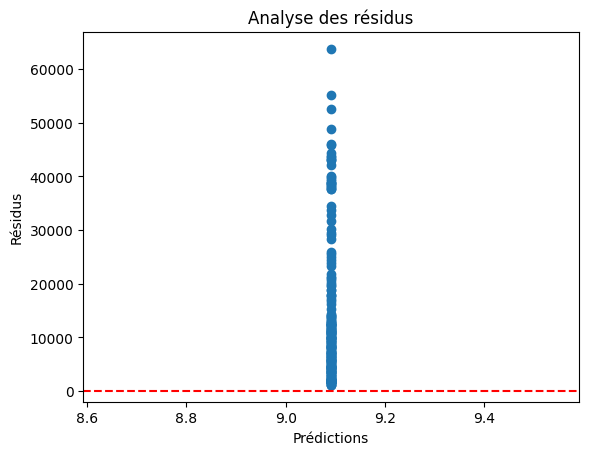

In [473]:
y_pred = pipe.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.title("Analyse des résidus")
plt.show()

In [470]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'polynomialfeatures__degree': [2, 3],  # Tester des degrés plus élevés
    'lasso__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10],  # Tester différentes régularisations
    'lasso__max_iter': [1000, 5000, 10000]  # Vérifier si des itérations supplémentaires aident
}



y_train_log = np.log1p(y_train)  # log(1 + y)
y_test_log = np.log1p(y_test)

grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train_log)


# Résultats
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)
print("Score sur l'ensemble de test :", grid.score(X_test, y_test_log))
y_pred_log = pipe.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Transformation inverse
r2_score(y_test, y_pred)

# pipe.fit(X_train, y_train_log)

# # Évaluer après transformation inverse
# y_pred_log = pipe.predict(X_test)
# y_pred = np.expm1(y_pred_log)  # Transformation inverse
# r2_score(y_test, y_pred)


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e-01, tolerance: 6.994e-02
  model = cd_fast.enet_coordinate_descent(


Meilleurs paramètres : {'lasso__alpha': 0.01, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 3}
Meilleur score R² (validation croisée) : 0.8186766314541336
Score sur l'ensemble de test : 0.879395028840302


-0.15815894885797221

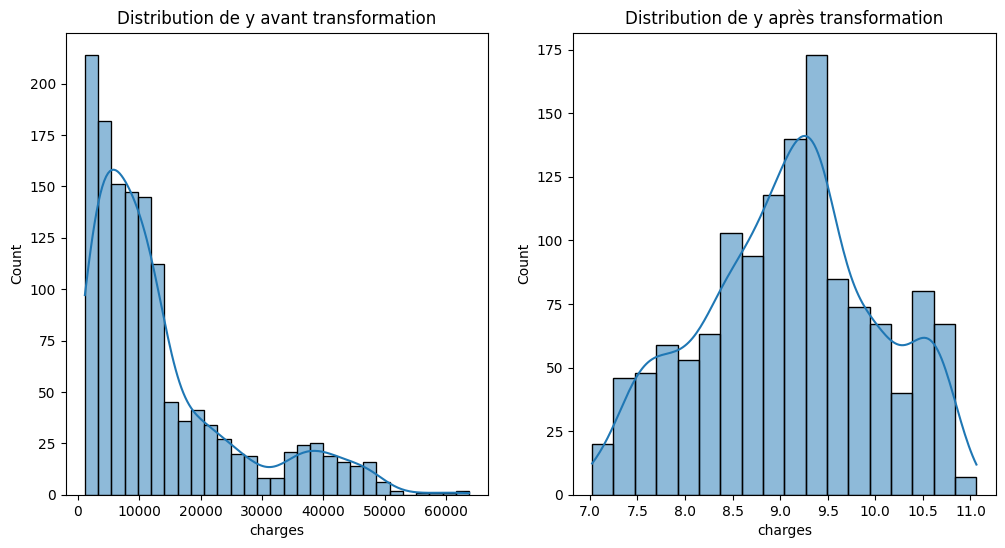

In [467]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title("Distribution de y avant transformation")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(y), kde=True)
plt.title("Distribution de y après transformation")
plt.show()

Donc ca parait un peu obligatoire au finale, genre on a pas vraiment le choix pour pouvoir recentrer le bazarre mais ça n'apparait pas flagrant dans les résultats..

k-fold cross-validation pour mieux évaluer le modèle ?!
randomizedsearchCV

In [4]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Préprocessing initial avant PolynomialFeatures
preprocessor_initial = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ]
)


#Test avec Lasso

pipe = make_pipeline(preprocessor_initial, PolynomialFeatures(degree=2, interaction_only=False),
                     StandardScaler(), SelectFromModel(Lasso(alpha=100, random_state=42)),
                     Lasso(alpha=100, random_state=42))
pipe.fit(X_train, y_train)


print("Score sur l'ensemble d'entraînement :", pipe.score(X_train, y_train))
print("Score sur l'ensemble de test :", pipe.score(X_test, y_test))

Score sur l'ensemble d'entraînement : 0.8319352174358174
Score sur l'ensemble de test : 0.8843795488463061


Apparement le selectFromModel permet de garder uniquement les valeurs les plus pertinentes..; Ca parait pas magique jusque là...

In [499]:
#Test modèle non linéaire
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, max_depth=3, random_state=42)
gbr.fit(X_train_transformed, y_train)
print("Score R² (test):", gbr.score(X_test_transformed, y_test))

Score R² (test): -0.24056600416901963


HAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAaaaaHAHAHAAHAHaHAHAHHAhAHHAH
Carrément une crise d'asthme de rire

Je me demande si il ne faudrait pas recommencer un autre notebook pour plus de clareté...
Genre est-ce qu'il y a pas des conneries au dessus que je trimballe de code e code et qui me gache la fiesta du résultat ? 

In [11]:
bins = [0, 29.999, 100]  # Tranches de BMI
labels = ['Normal weight', 'Obesity']

#Add a new column in DF for bmi bins
df["bmi_category"] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)
df

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,bmi_category
0,0,19,female,27.900,0,yes,southwest,16884.92400,Normal weight
1,1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,4,32,male,28.880,0,no,northwest,3866.85520,Normal weight
...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1335,1336,21,female,25.800,0,no,southwest,2007.94500,Normal weight


## Test of GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker", "bmi_category"]),  
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]), 
        ("scaler", StandardScaler(), ["children"]),
        ("r_scaler", RobustScaler(), ["age"])
    ],
remainder="drop"
)
polynomial = PolynomialFeatures(degree=2, interaction_only=False)

# Remplacer Lasso par GradientBoostingRegressor
pipe = make_pipeline(
    preprocessor,
    polynomial,
    StandardScaler(),
    GradientBoostingRegressor(random_state=42) 
)


# Ajuster le modèle sur les données d'entraînement
pipe.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = pipe.predict(X_test)

# Évaluer les performances (par exemple, avec la métrique R² ou MSE)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 21033077.30
R² Score: 0.89


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "gradientboostingregressor__n_estimators": [100, 200, 300],
    "gradientboostingregressor__learning_rate": [0.01, 0.05, 0.1],
    "gradientboostingregressor__max_depth": [3, 4, 5],
    "gradientboostingregressor__min_samples_split": [2, 5, 10],
    "gradientboostingregressor__min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best R² on training set:", grid_search.best_score_)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Évaluation sur les données de test
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² on test set: {r2:.2f}")



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__min_samples_leaf': 4, 'gradientboostingregressor__min_samples_split': 10, 'gradientboostingregressor__n_estimators': 100}
Best R² on training set: 0.8411619559264691
R² on test set: 0.90


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

pipe = make_pipeline(
    preprocessor,
    polynomial,
    StandardScaler(),
    GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.01,
        max_depth=4,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        random_state=42
    )
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 20103265.99
R² Score: 0.89


In [20]:
pipe = make_pipeline(
    preprocessor,
    polynomial,
    StandardScaler(),
    GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.01,
        max_depth=4,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        random_state=42
    )
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker', 'bmi_category']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['children']),
                                                 ('r_scaler', RobustScaler(),
                                                  ['age'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           min_samples_leaf=4,
                                           min_samples_split=10,
                                           n_estimators=300, random_state=42,
                                           subsample=0.8))])

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prétraitement des données
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Application des transformations polynomiales
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_transformed)
X_test_poly = poly.transform(X_test_transformed)

# Mise à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Entraînement du modèle
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=4,
    min_child_weight=4,
    subsample=0.8,
    colsample_bytree=1.0,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)

# Prédiction
y_pred = xgb.predict(X_test_scaled)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 19958320.79
R² Score: 0.89
